In [18]:
# Import Libraries & Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the path to the Excel file
file_path = r'C:\Users\Meenakshi Sinha\OneDrive\Desktop\Churn Analysis\PreviewedFiles.xlsx'

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(data.head())


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

In [19]:
# Data Processing
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be Label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[801  51]
 [133 217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       852
           1       0.81      0.62      0.70       350

    accuracy                           0.85      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.85      0.84      1202



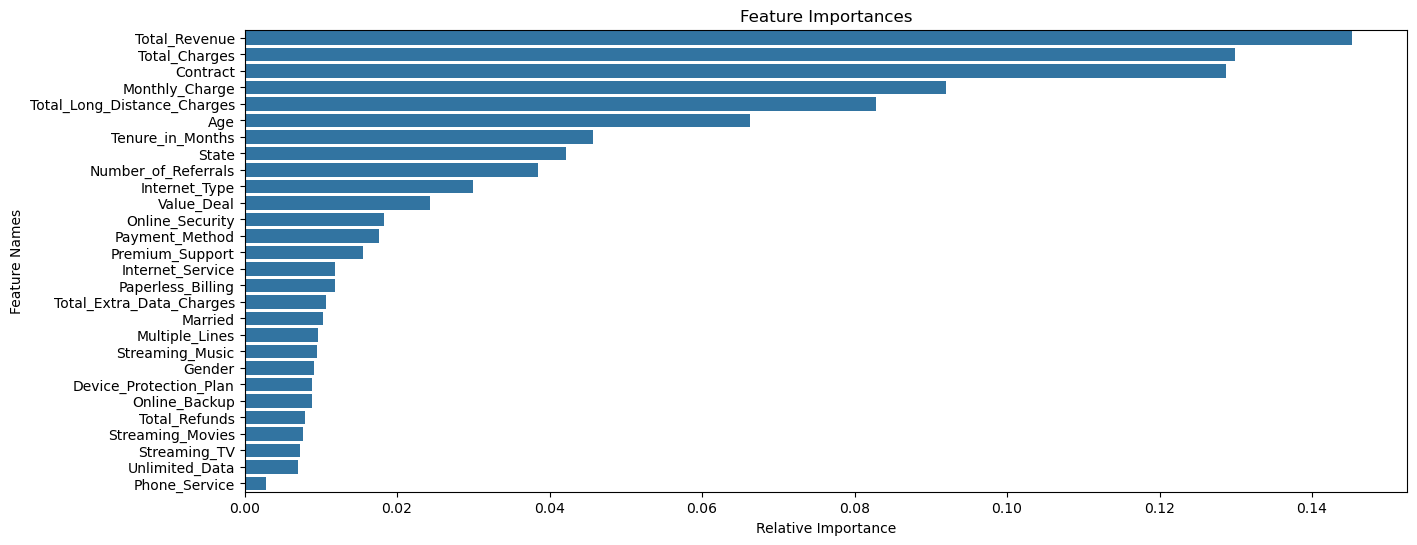

In [21]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


Confusion Matrix:
[[801  51]
 [133 217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       852
           1       0.81      0.62      0.70       350

    accuracy                           0.85      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.85      0.84      1202



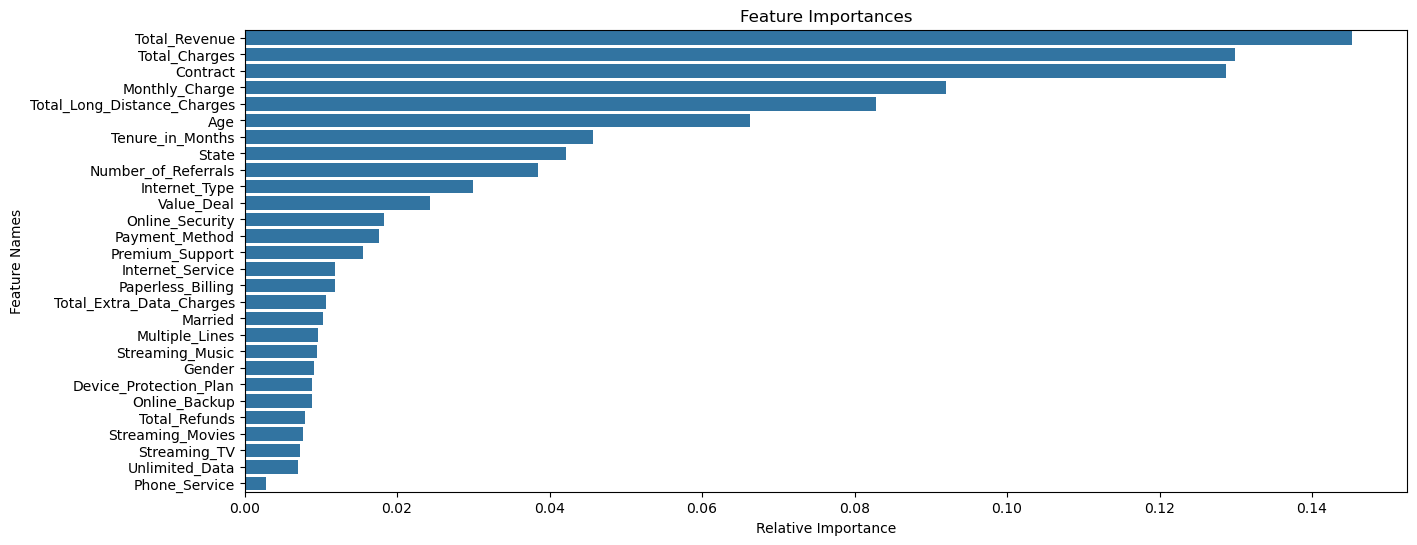

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\yourpath\\Prediction_Data.xlsx'

In [22]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()







#Use Model for Prediction on New Data
# Define the path to the Joiner Data Excel file
file_path = r"C:\yourpath\Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"C:\yourpath\Predictions.csv", index=False)


📄 Training Data Loaded:
   Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902   

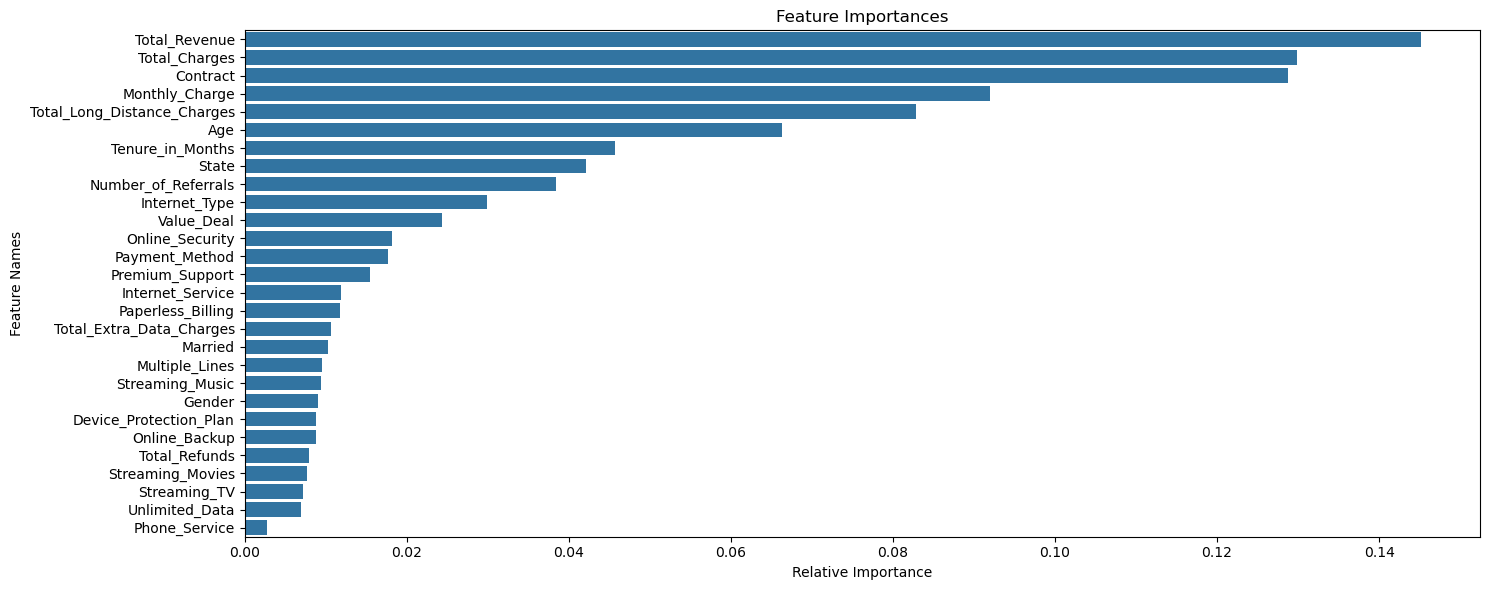


📄 New Data for Prediction:
   Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   14567-TAM    Male   43      No     Tamil Nadu                    1   
1   15803-UTT  Female   34      No  Uttar Pradesh                    6   
2   17597-HAR  Female   33     Yes        Haryana                    2   
3   21956-JHA  Female   59     Yes      Jharkhand                   10   
4   22119-WES    Male   31     Yes    West Bengal                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 9        NaN           Yes             No  ...   
1                31        NaN           Yes             No  ...   
2                 6     Deal 5            No             No  ...   
3                 8        NaN           Yes             No  ...   
4                 5        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      20.350000     20.350000     

In [ ]:
# ------------------- Step 1: Import Libraries -------------------
#corrected one 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# ------------------- Step 2: Load & Preprocess Training Data -------------------
# Define the path to the Excel file and sheet
file_path = r"C:\Users\Meenakshi Sinha\OneDrive\Desktop\Churn Analysis\PreviewedFiles.xlsx"
sheet_name = 'vw_ChurnData'

# Load the training data
data = pd.read_excel(file_path, sheet_name=sheet_name)
print("📄 Training Data Loaded:\n", data.head())

# Drop columns not needed
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to encode
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Label Encoding
label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Encode target
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# ------------------- Step 3: Train-Test Split -------------------
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------- Step 4: Train Model -------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ------------------- Step 5: Evaluate Model -------------------
y_pred = rf_model.predict(X_test)
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance Plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.tight_layout()
plt.show()

# ------------------- Step 6: Use Model on New Data -------------------
# Load new data for prediction
sheet_name_new = 'vw_JoinData'
new_data = pd.read_excel(file_path, sheet_name=sheet_name_new)
print("\n📄 New Data for Prediction:\n", new_data.head())

# Retain original and Customer_ID
original_data = new_data.copy()
customer_ids = new_data['Customer_ID']

# Drop unused columns
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Apply same encoding to new data
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        new_data[column] = label_encoders[column].transform(new_data[column])
    else:
        print(f"⚠️ Warning: Encoder missing for column '{column}'")

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add to original
original_data['Customer_Status_Predicted'] = new_predictions

# Filter churned
churned_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# ------------------- Step 7: Save Prediction -------------------
output_path = r"C:\Users\Meenakshi Sinha\OneDrive\Desktop\Churn Analysis\Prediction.csv"
churned_data.to_csv(output_path, index=False)
print(f"\n✅ Predictions saved to: {output_path}")
